<a href="https://colab.research.google.com/github/NasiUduk27/uts-machine-learning-ti3f/blob/main/UTS_Dhoriffito_Diansyah_Putra_TI3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [181]:
image_paths = [
    "/content/drive/MyDrive/content/uts_machlearn/1.jpg",
    "/content/drive/MyDrive/content/uts_machlearn/2.jpg",
    "/content/drive/MyDrive/content/uts_machlearn/3.jpg",
    "/content/drive/MyDrive/content/uts_machlearn/4.jpg",
    "/content/drive/MyDrive/content/uts_machlearn/5.jpg"
]

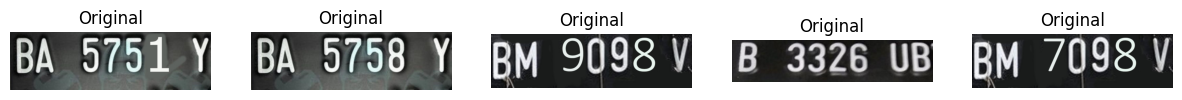

In [182]:
original_images = [cv2.imread(img) for img in image_paths]

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax, image in zip(axes, original_images):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(rgb_image)
    ax.set_title('Original')
    ax.axis('off')
plt.show()

# Plat nomor 1

In [133]:
img = cv2.imread('/content/drive/MyDrive/content/uts_machlearn/1.jpg')

In [134]:
h, w, ch = img.shape
print(h)
print(w)
print(ch)

343
1183
3


In [135]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(405769, 3)

In [136]:
# RGB Color Space Plot

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

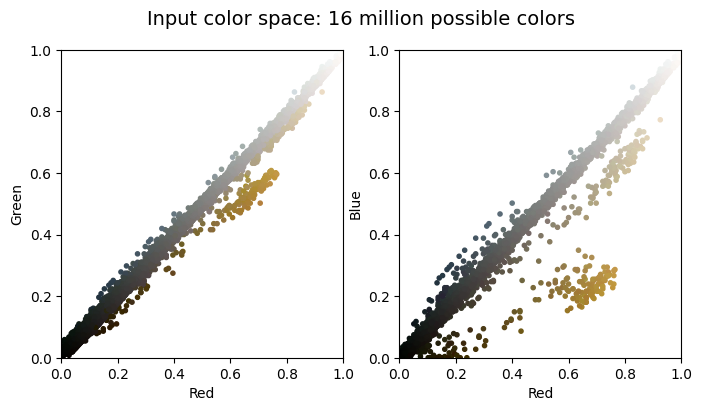

In [53]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [139]:
# Segmentasi image menggunakan K-means

from sklearn.cluster import KMeans

# Reshape image into 2D array (for K-Means)
citra_reshape = img.reshape((-1, 3))

# Determine the desired number of clusters
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Move the cluster labels back to their original shape
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# For example, you can show the first cluster (0) as red
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

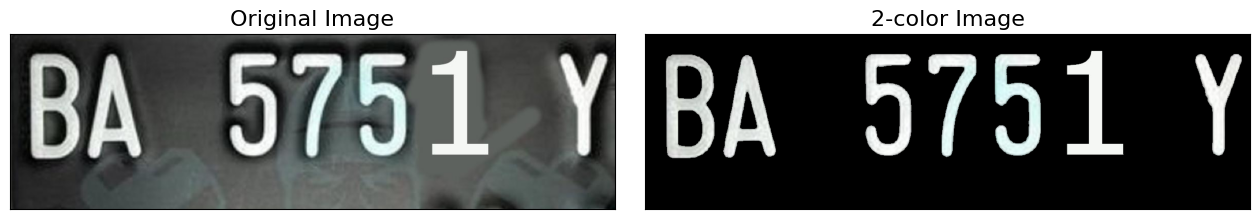

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

# Plat nomor 2

In [141]:
img2 = cv2.imread('/content/drive/MyDrive/content/uts_machlearn/2.jpg')

In [142]:
h, w, ch = img2.shape
print(h)
print(w)
print(ch)

343
1183
3


In [143]:
data = img2 / 255.0
data = data.reshape(h * w, ch)
data.shape

(405769, 3)

In [144]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

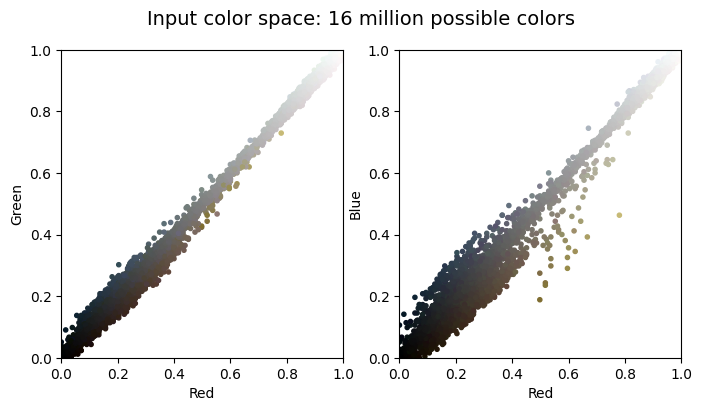

In [91]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [147]:
# Segmentasi Image menggunakan K-means

from sklearn.cluster import KMeans

# Reshape image into 2D array (for K-Means)
citra_reshape = img2.reshape((-1, 3))

# Determine the desired number of clusters
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Move the cluster labels back to their original shape
label_klaster = kmeans.labels_.reshape(img2.shape[:2])

# For example, you can show the first cluster (0) as red
citra_segmentasi = img2.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

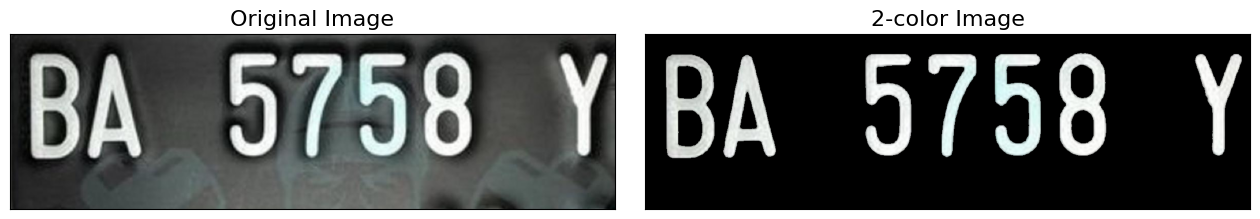

In [148]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

# Plat nomor 3

In [149]:
img3 = cv2.imread('/content/drive/MyDrive/content/uts_machlearn/3.jpg')

In [150]:
h, w, ch = img3.shape
print(h)
print(w)
print(ch)

298
1089
3


In [151]:
data = img3 / 255.0
data = data.reshape(h * w, ch)
data.shape

(324522, 3)

In [152]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

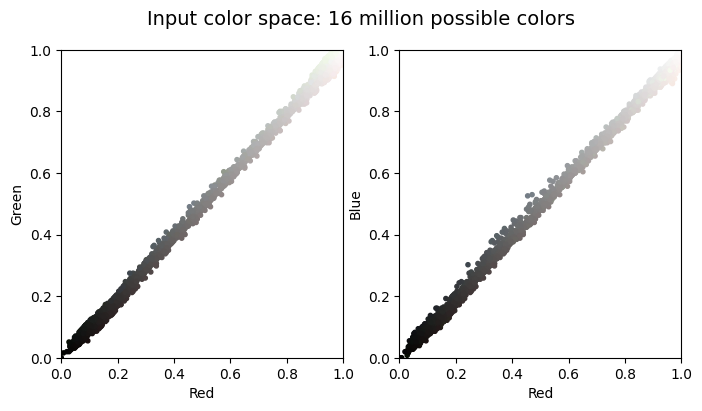

In [153]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [212]:
# Segmentasi Image menggunakan K-means

from sklearn.cluster import KMeans

# Reshape image into 2D array (for K-Means)
citra_reshape = img3.reshape((-1, 3))

# Determine the desired number of clusters
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Move the cluster labels back to their original shape
label_klaster = kmeans.labels_.reshape(img3.shape[:2])

# For example, you can show the first cluster (0) as red
citra_segmentasi = img3.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

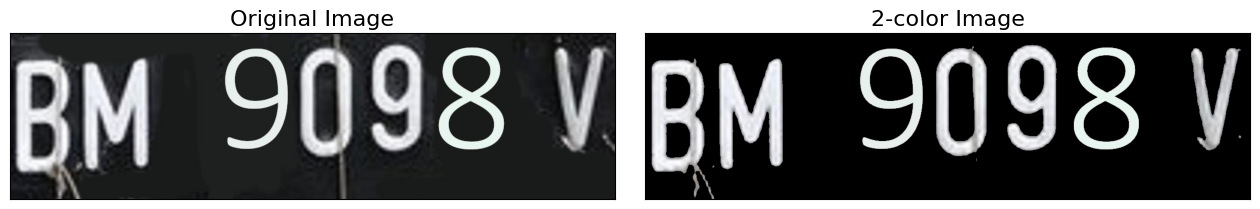

In [213]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

# Plat nomor 4

In [183]:
img4 = cv2.imread('/content/drive/MyDrive/content/uts_machlearn/4.jpg')

In [184]:
h, w, ch = img4.shape
print(h)
print(w)
print(ch)

161
778
3


In [185]:
data = img4 / 255.0
data = data.reshape(h * w, ch)
data.shape

(125258, 3)

In [192]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

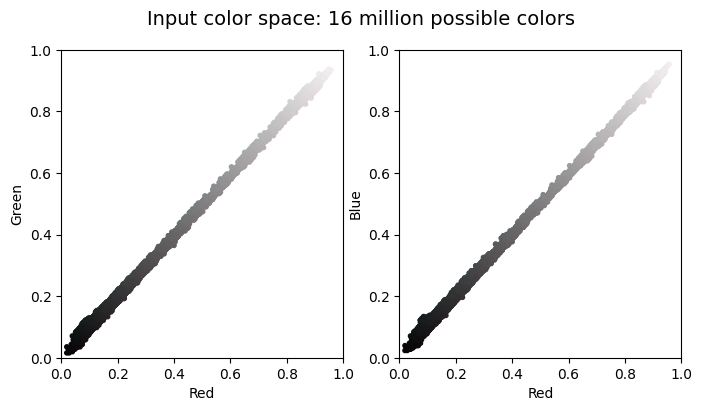

In [193]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [210]:
# Segmentasi Image menggunakan K-means

from sklearn.cluster import KMeans

# Reshape image into 2D array (for K-Means)
citra_reshape = img4.reshape((-1, 3))

# Determine the desired number of clusters
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Move the cluster labels back to their original shape
label_klaster = kmeans.labels_.reshape(img4.shape[:2])

# For example, you can show the first cluster (0) as red
citra_segmentasi = img4.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

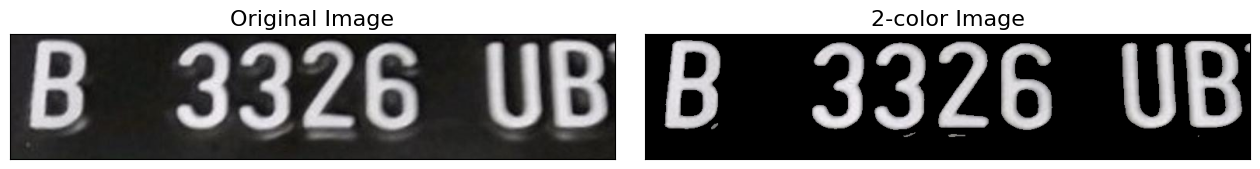

In [211]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

# Plat nomor 5

In [196]:
img5 = cv2.imread('/content/drive/MyDrive/content/uts_machlearn/5.jpg')

In [197]:
h, w, ch = img5.shape
print(h)
print(w)
print(ch)

298
1089
3


In [205]:
data = img5 / 255.0
data = data.reshape(h * w, ch)
data.shape

(324522, 3)

In [206]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

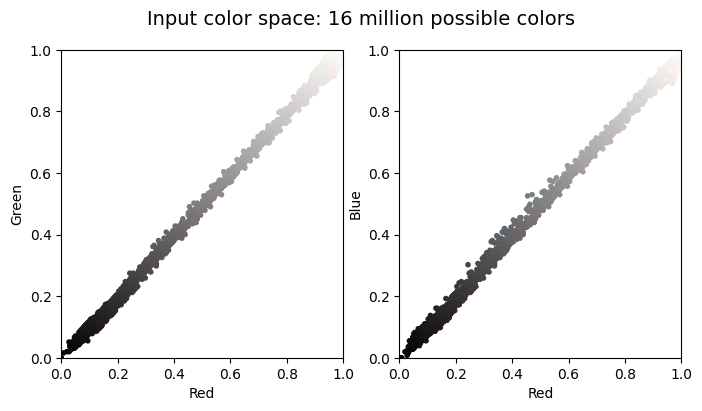

In [200]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [208]:
# Segmentasi Image menggunakan K-means

from sklearn.cluster import KMeans

# Reshape image into 2D array (for K-Means)
citra_reshape = img5.reshape((-1, 3))

# Determine the desired number of clusters
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Move the cluster labels back to their original shape
label_klaster = kmeans.labels_.reshape(img5.shape[:2])

# For example, you can show the first cluster (0) as red
citra_segmentasi = img5.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

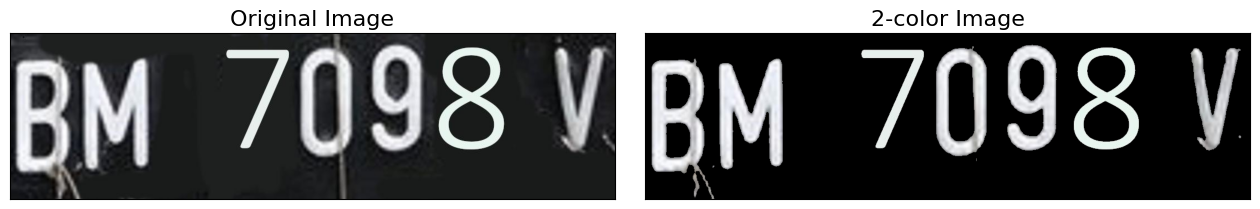

In [209]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)